In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def H(S, muB, J, N):
    H1 = -1.0*muB*np.sum(S)
    H2 = 0.0
    for i in range(N-1):
        H2 += S[i]*S[i+1]
    #H2 += S[0]*S[-1] #should we take into account periodic boundary condition term
    H = H1 - J*H2
    return H

In [3]:
def dH(Si, Sip1, Sim1, muB, J):
    dH = 2.0*Si*muB + 2.0*Si*J*(Sip1 + Sim1)
    return dH

In [4]:
kB_inv = 1e23/1.3

In [ ]:
"""
mu = 2e-22
B = 0.5
T = np.arange(0.1, 100.0, 0.1)
J = -3e-22
"""

In [5]:
#number of spins
N = 1000
#Magnetic field
mu = 2e-22
B = 0.5
J = -3e-22
muB = mu*B

In [6]:
Nsteps = 50000

In [7]:
BurnIn = 10000

In [8]:
T = np.arange(5.0, 101.0, 5.0)

In [9]:
avg_S_T = np.ndarray(shape = (len(T)))

In [10]:
for j in np.arange(0, len(T), 1):
    temp = T[j]
    print("temp", temp)
    S = np.ndarray(shape = (N), dtype = int)
    for i in range(N):
        S[i] = (-1)**i

    flip_index = np.ndarray(shape = (Nsteps), dtype = int)
    for i in range(Nsteps):
        flip_index[i] = int(np.random.uniform(0, N, 1))

    S_chain = np.ndarray(shape = (Nsteps, N))
    S_chain[0,:] = S 

    avg_Spin = np.ndarray(shape = (Nsteps))
    avg_Spin[0] = 1.0*np.sum(S_chain[0,:])/N

    H_array = np.ndarray(shape = (Nsteps))

    H0 = H(S, muB, J, N)

    energy_array = np.ndarray(shape = (Nsteps))
    energy_array[0] = H0

    for i in np.arange(1, Nsteps, 1):
    #print(i)
        flip = flip_index[i] # = flip
        #flip the Spin at location 'flip'
        S[flip] = -1*S[flip]
        flipP1 = flip + 1
        flipM1 = flip - 1
        #periodic boundary conditions
        if flip == N-1:
            flipP1 = 0
        if flip == 0:
            flipM1 = N-1
        dE = dH(S[flip], S[flipP1], S[flipM1], muB, J)
        
        energy_array[i] = H(S, muB, J, N)
        if dE < 0.0:
            S_chain[i, :] = np.copy(S)
        else: 
            alpha = np.random.uniform(0, 1, 1)
            if np.log(alpha) < -1.0*dE*kB_inv/temp:
                S_chain[i, :] = np.copy(S)
            else: 
                S_chain[i,:] = np.copy(S_chain[i-1,:])
                S[flip] = -1*S[flip]
        avg_Spin[i] = 1.0*np.sum(S_chain[i,:])/N
        H_array[i] = H(S, muB, J, N)
    avg_S_T[j] = np.mean(avg_Spin[BurnIn:])

temp 5.0
temp 10.0
temp 15.0
temp 20.0
temp 25.0
temp 30.0
temp 35.0
temp 40.0
temp 45.0
temp 50.0
temp 55.0
temp 60.0
temp 65.0
temp 70.0
temp 75.0
temp 80.0
temp 85.0
temp 90.0
temp 95.0
temp 100.0


In [11]:
#analytical solution
gamma = mu*B*kB_inv/T
avg_M = np.sinh(gamma)/np.sqrt( np.sinh(gamma)**2 + np.exp(4.0*J*kB_inv/T) )

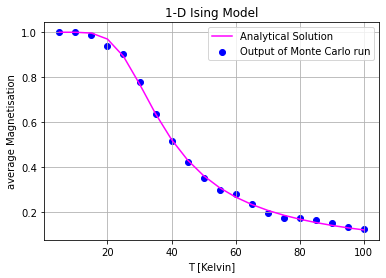

In [12]:
plt.scatter(T, -1.0*avg_S_T, color = 'blue', label = "Output of Monte Carlo run")
plt.plot(T, avg_M, color = 'magenta', label = "Analytical Solution")
plt.legend(loc = 'upper right')
plt.title("1-D Ising Model")
plt.xlabel("T [Kelvin]")
plt.ylabel("average Magnetisation")
plt.grid()
plt.savefig("OneD_Ising_Model_avgM_pve.png")
plt.savefig("OneD_Ising_Model_avgM_pve.pdf")